In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df =pd.read_csv('Fraud.csv',on_bad_lines= 'skip')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df['type_encoded'] = df['type'].astype('category').cat.codes
df['nameOrig_encoded'] = df['nameOrig'].astype('category').cat.codes
df['nameDest_encoded'] = df['nameDest'].astype('category').cat.codes



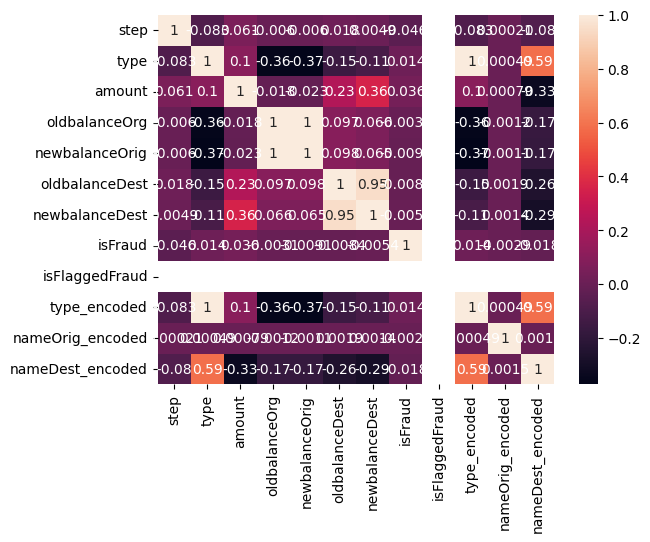

In [ ]:
# Select only numeric features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
df.drop(['newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151798 entries, 0 to 151797
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              151798 non-null  int64  
 1   type              151798 non-null  int8   
 2   amount            151798 non-null  float64
 3   nameOrig          151798 non-null  object 
 4   oldbalanceOrg     151798 non-null  float64
 5   nameDest          151798 non-null  object 
 6   oldbalanceDest    151798 non-null  float64
 7   isFraud           151798 non-null  float64
 8   isFlaggedFraud    151798 non-null  float64
 9   type_encoded      151798 non-null  int8   
 10  nameOrig_encoded  151798 non-null  int32  
 11  nameDest_encoded  151798 non-null  int32  
dtypes: float64(5), int32(2), int64(1), int8(2), object(2)
memory usage: 11.9+ MB


In [ ]:

df.drop(columns=['nameDest'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151798 entries, 0 to 151797
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              151798 non-null  int64  
 1   type              151798 non-null  int8   
 2   amount            151798 non-null  float64
 3   oldbalanceOrg     151798 non-null  float64
 4   oldbalanceDest    151798 non-null  float64
 5   isFraud           151798 non-null  float64
 6   isFlaggedFraud    151798 non-null  float64
 7   type_encoded      151798 non-null  int8   
 8   nameOrig_encoded  151798 non-null  int32  
 9   nameDest_encoded  151798 non-null  int32  
dtypes: float64(5), int32(2), int64(1), int8(2)
memory usage: 9.6 MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('isFraud', axis=1)
y = df['isFraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9995718050065876
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30343
         1.0       0.75      0.35      0.48        17

    accuracy                           1.00     30360
   macro avg       0.87      0.68      0.74     30360
weighted avg       1.00      1.00      1.00     30360



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score # Import roc_auc_score

# Recreate X and y before fitting the XGBoost model:
X = df.drop('isFraud', axis=1)  # Ensure X is updated with the latest df
y = df['isFraud']            # Ensure y is updated with the latest df

# Redo the train-test split to ensure consistency:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model:
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30343
         1.0       0.71      0.59      0.65        17

    accuracy                           1.00     30360
   macro avg       0.86      0.79      0.82     30360
weighted avg       1.00      1.00      1.00     30360

ROC-AUC Score: 0.9970242191725585


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np


X_train = df.drop(columns=['isFraud'], errors='ignore')


iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X_train)


df['isFraud_predicted'] = np.where(df['anomaly_score'] == -1, 1, 0)


print(df[['isFraud_predicted']].value_counts())


isFraud_predicted
0                    151646
1                       152
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print(confusion_matrix(df['isFraud'], df['isFraud_predicted']))
print(classification_report(df['isFraud'], df['isFraud_predicted']))


[[151521    146]
 [   125      6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    151667
         1.0       0.04      0.05      0.04       131

    accuracy                           1.00    151798
   macro avg       0.52      0.52      0.52    151798
weighted avg       1.00      1.00      1.00    151798



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

use_smote = True



df["amount_log"] = np.log1p(df["amount"])
df["transaction_hour"] = df["step"] % 24
df["transaction_day"] = (df["step"] // 24) % 7
df["is_round_amount"] = (df["amount"] % 100 == 0).astype(int)
df["balance_change_orig"] = df["oldbalanceOrg"] - df["amount"]
df["balance_change_dest"] = df["oldbalanceDest"] + df["amount"]
df.drop(columns=["nameOrig", "nameDest"], inplace=True, errors="ignore")

df = pd.get_dummies(df, columns=["type"], drop_first=True)

X = df.drop(columns=["isFraud"])
y = df["isFraud"]

scaler = StandardScaler()
X[["amount_log", "balance_change_orig", "balance_change_dest"]] = scaler.fit_transform(
    X[["amount_log", "balance_change_orig", "balance_change_dest"]]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

if use_smote:
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    rus = RandomUnderSampler()
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", max_depth=10, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

iso_forest = IsolationForest(n_estimators=300, contamination=0.001, random_state=42)
df["isFraud_predicted"] = iso_forest.fit_predict(X)
df["isFraud_predicted"] = df["isFraud_predicted"].apply(lambda x: 1 if x == -1 else 0)

print(df["isFraud_predicted"].value_counts())


NameError: name 'df' is not defined